# Linear Regression using Gradient Descent (From Scratch)

## Objective
Implement linear regression **without using any ML libraries**, using only NumPy.
The goal is to understand **how models learn iteratively** by minimizing a loss
function using **gradient descent**.

## What this notebook covers
- Linear regression model formulation
- Mean Squared Error (MSE) loss
- Gradient computation from first principles
- Iterative parameter updates using gradient descent
- Visualizing loss reduction and final model fit

## Why Gradient Descent?
The normal equation gives a closed-form solution, but it:
- Requires matrix inversion
- Does not scale to large datasets

Gradient descent avoids matrix inversion and forms the foundation of:
- Logistic Regression
- Neural Networks
- Deep Learning models

This notebook focuses on **intuition + mechanics**, not shortcuts.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

X = np.linspace(0, 10, 50).reshape(-1, 1)
y = 3*X.squeeze() + 5 + np.random.randn(50)*2

X_b = np.c_[np.ones((X.shape[0], 1)), X]


In [2]:
w = np.zeros(X_b.shape[1])
lr = 0.01
epochs = 1000

In [3]:
def mse_loss(X, y, w):
    y_pred = X @ w
    return np.mean((y_pred - y)**2)

In [4]:
def compute_gradient(X, y, w):
    n = len(y)
    return (2/n) * X.T @ (X @ w - y)


In [5]:
losses = []

for _ in range(epochs):
    grad = compute_gradient(X_b, y, w)
    w = w - lr * grad
    losses.append(mse_loss(X_b, y, w))


In [6]:
w

array([5.09950581, 2.88842863])

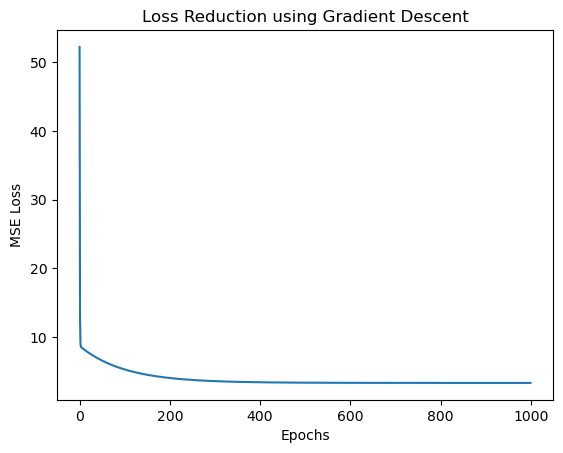

In [7]:
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Loss Reduction using Gradient Descent")
plt.show()

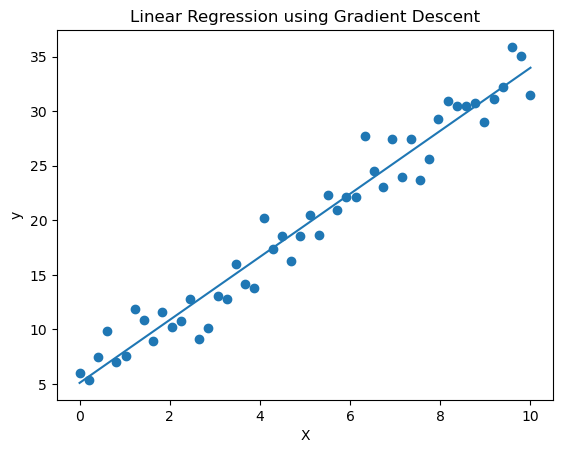

In [8]:
y_pred = X_b @ w

plt.scatter(X, y)
plt.plot(X, y_pred)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression using Gradient Descent")
plt.show()

## ML Interpretation & Key Takeaways

1. **Gradient Descent as Learning**
   - The model starts with arbitrary parameters.
   - At each step, it computes how wrong it is (loss).
   - The gradient tells the direction of maximum increase in loss.
   - Moving in the opposite direction reduces error.
   - Repeating this process leads to optimal parameters.

2. **Why Gradient Descent Works Here**
   - Mean Squared Error for linear regression creates a **convex loss surface**.
   - A convex surface guarantees a single global minimum.
   - Hence, gradient descent converges to the same solution as the normal equation.

3. **Role of Learning Rate**
   - Too small → very slow convergence.
   - Too large → overshooting and divergence.
   - Choosing a proper learning rate is critical for stable learning.

4. **Why This Generalizes to Deep Learning**
   - Neural networks also minimize a loss function.
   - Closed-form solutions do not exist for complex models.
   - Gradient descent (and its variants) is the only practical way to learn.

5. **Big Picture**
   - Linear regression with gradient descent is the simplest example of
     how machines learn from data.
   - Every modern ML and DL model is an extension of this same idea:
     **predict → compute loss → compute gradient → update parameters**.
